In [10]:
import sys
sys.path.insert(0, '..')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import pandas as pd
from utils.plot_metrics import plot_metrics

## To train the model, follow the following steps:

### 1. Extract the data

In [ ]:
# !7z x -y ../data/raw/DocLayNet_core.zip -o./DocLayNet_core

### 2. Run the below script

In [ ]:
# output_dir = "./output"
# device = "cuda"

# !python ./layout-model-training/tools/train_net.py \
#     "--dataset_name"            DocLayNet \
#     "--json_annotation_train"   "./DocLayNet_core/COCO/train.json" \
#     "--image_path_train"        "./DocLayNet_core/PNG" \
#     "--json_annotation_val"     "./DocLayNet_core/COCO/test.json" \
#     "--image_path_val"          "./DocLayNet_core/PNG" \
#     "--config-file"             "./layout-model-training/configs/prima/fast_rcnn_R_50_FPN_3x.yaml" \
#     "--resume" \
#     "OUTPUT_DIR"                "{output_dir}" \
#     "SOLVER.IMS_PER_BATCH"      4 \
#     "MODEL.DEVICE"              "{device}" \
#     "SOLVER.BASE_LR"            0.01 \
#     "SOLVER.MAX_ITER"           80000 \
#     "SOLVER.CHECKPOINT_PERIOD"  300

NB: the files at `./layout-model-training/tools/train_net.py` was included by `git subtree add --prefix model/layout-model-training https://github.com/Layout-Parser/layout-model-training.git master`

## Results

In [2]:
metrics_df = pd.read_json('./trained_model/metrics.json', orient="records", lines=True)
mdf = metrics_df.sort_values("iteration")
mdf.head(10).T

0             1             2  \
data_time                      0.008384      0.008775      0.008960   
eta_seconds                30040.116253  30032.604346  30199.984691   
fast_rcnn/cls_accuracy         0.971680      0.962891      0.930664   
fast_rcnn/false_negative       1.000000      1.000000      1.000000   
fast_rcnn/fg_cls_accuracy      0.000000      0.000000      0.000000   
iteration                     19.000000     39.000000     59.000000   
loss_box_reg                   0.005330      0.045536      0.182375   
loss_cls                       0.242587      0.356886      0.420098   
loss_rpn_cls                   0.700573      0.584717      0.443300   
loss_rpn_loc                   0.336152      0.313502      0.241430   
lr                             0.000200      0.000400      0.000599   
rank_data_time                 0.008384      0.008775      0.008960   
roi_head/num_bg_samples      497.875000    493.000000    476.500000   
roi_head/num_fg_samples       14.125000     19.000000     35.500000   
rpn/num_neg_anchors          180.125000    186.250000    184.375000   
rpn/num_pos_anchors           75.875000     69.750000     71.625000   
time                           0.375595      0.377317      0.381449   
total_loss                     1.385000      1.235328      1.374799   
bbox/AP                             NaN           NaN           NaN   
bbox/AP-Caption                     NaN           NaN           NaN   
bbox/AP-Footnote                    NaN           NaN           NaN   
bbox/AP-Formula                     NaN           NaN           NaN   
bbox/AP-List-item                   NaN           NaN           NaN   
bbox/AP-Page-footer                 NaN           NaN           NaN   
bbox/AP-Page-header                 NaN           NaN           NaN   
bbox/AP-Picture                     NaN           NaN           NaN   
bbox/AP-Section-header              NaN           NaN           NaN   
bbox/AP-Table                       NaN           NaN           NaN   
bbox/AP-Text                        NaN           NaN           NaN   
bbox/AP-Title                       NaN           NaN           NaN   
bbox/AP50                           NaN           NaN           NaN   
bbox/AP75                           NaN           NaN           NaN   
bbox/APl                            NaN           NaN           NaN   
bbox/APm                            NaN           NaN           NaN   
bbox/APs                            NaN           NaN           NaN   

                                      3             4             5  \
data_time                      0.009312      0.009425      0.008924   
eta_seconds                30397.155697  30450.676296  30443.054099   
fast_rcnn/cls_accuracy         0.922119      0.927246      0.922607   
fast_rcnn/false_negative       1.000000      1.000000      1.000000   
fast_rcnn/fg_cls_accuracy      0.000000      0.000000      0.000000   
iteration                     79.000000     99.000000    119.000000   
loss_box_reg                   0.244092      0.200095      0.219698   
loss_cls                       0.368185      0.321174      0.327423   
loss_rpn_cls                   0.333261      0.271206      0.204834   
loss_rpn_loc                   0.246864      0.228371      0.217888   
lr                             0.000799      0.000999      0.001199   
rank_data_time                 0.009312      0.009425      0.008924   
roi_head/num_bg_samples      472.125000    474.750000    471.500000   
roi_head/num_fg_samples       39.875000     37.250000     40.500000   
rpn/num_neg_anchors          190.125000    186.750000    185.000000   
rpn/num_pos_anchors           65.875000     69.250000     71.000000   
time                           0.387139      0.385061      0.380078   
total_loss                     1.180483      1.041189      1.030759   
bbox/AP                             NaN           NaN           NaN   
bbox/AP-Caption                     NaN           NaN        

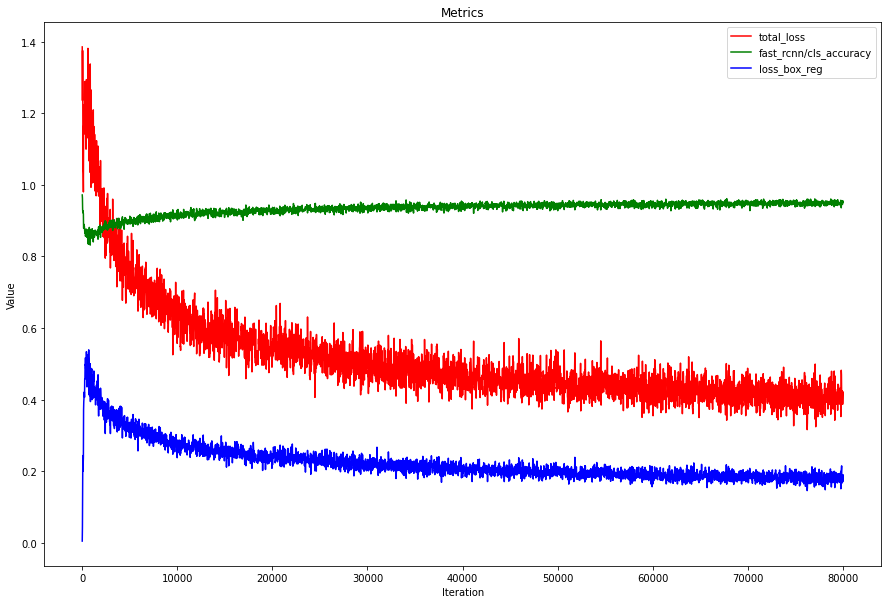

In [20]:
plot_metrics([
    [
        (mdf["iteration"], mdf["total_loss"], "total_loss", 'red'),
        (mdf["iteration"], mdf["fast_rcnn/cls_accuracy"], "fast_rcnn/cls_accuracy", 'green'),
        (mdf["iteration"], mdf["loss_box_reg"], 'loss_box_reg', 'blue')
    ]
], 
remove_na=True,
title = "Metrics",
xlabel="Iteration",
ylabel="Value",
figsize=(15, 10))